# LetsGrowMore VIP in Data Analytics

# Author - KIRANDEEP KAUR

### Batch - November 2021

### Task 3 - Iris Flowers Classification ML Project 

#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

#### Load Dataset

In [3]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
target = pd.Series(iris.target)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Checking Unique Labels.

In [7]:
target.unique()

array([0, 1, 2])

#### EDA

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Count'>

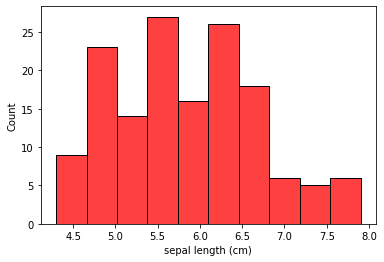

In [8]:
sns.histplot(data['sepal length (cm)'], bins = 10, color = 'red')

<AxesSubplot:xlabel='sepal width (cm)', ylabel='Count'>

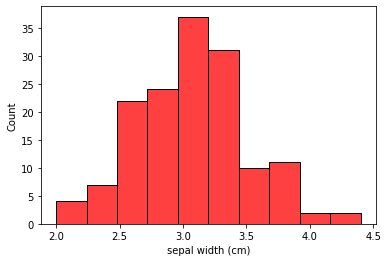

In [9]:
sns.histplot(data['sepal width (cm)'], bins = 10, color = 'r')

<AxesSubplot:xlabel='petal length (cm)', ylabel='Count'>

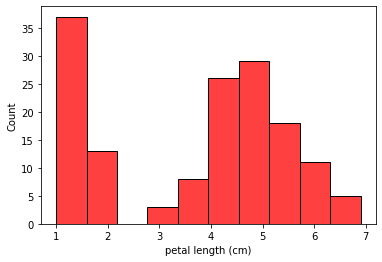

In [10]:
sns.histplot(data['petal length (cm)'], bins = 10, color = 'r')

<AxesSubplot:xlabel='petal width (cm)', ylabel='Count'>

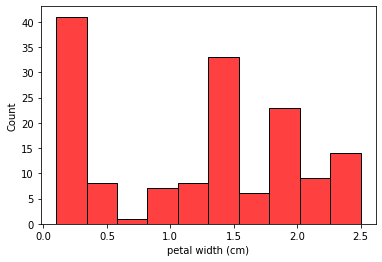

In [11]:
sns.histplot(data['petal width (cm)'], bins = 10, color = 'r')

#### Sepal length VS petal length

Text(0, 0.5, 'petal length')

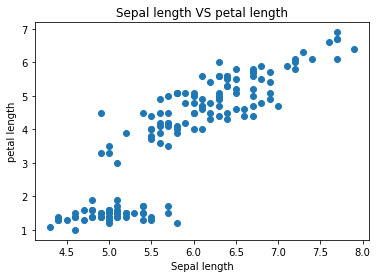

In [12]:
plt.scatter(data['sepal length (cm)'], data['petal length (cm)'])
plt.title('Sepal length VS petal length')
plt.xlabel('Sepal length')
plt.ylabel('petal length')

#### Sepal width VS petal width

Text(0, 0.5, 'petal width')

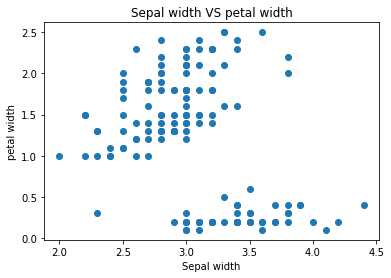

In [13]:
plt.scatter(data['sepal width (cm)'], data['petal width (cm)'])
plt.title('Sepal width VS petal width')
plt.xlabel('Sepal width')
plt.ylabel('petal width')

### Elbow Method for choosing the no. of Clusters.

###### Here we will apply KMeans only on 2 columns for demo purpose.

In [14]:
from sklearn.cluster import KMeans

In [15]:
K = range(1,10)
SSE = []

for i in K:
    KM = KMeans(n_clusters = i)
    KM.fit(data[['sepal length (cm)','petal length (cm)']])
    SSE.append(KM.inertia_)

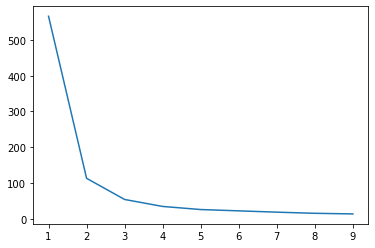

In [16]:
plt.plot(K,SSE)

### Clustering Algorithm
#### From Elbow Method we can clearly take up 3 number of clusters.

In [17]:
model = KMeans(n_clusters = 3)
pred = model.fit_predict(data[['sepal length (cm)','petal length (cm)']])
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [18]:
data['Clusters'] = pred
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [19]:
final_df = data.drop(['sepal width (cm)','petal width (cm)'], axis = 1)

In [20]:
final_df.head()

,sepal length (cm),petal length (cm),Clusters
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1


#### Final_df Visualization

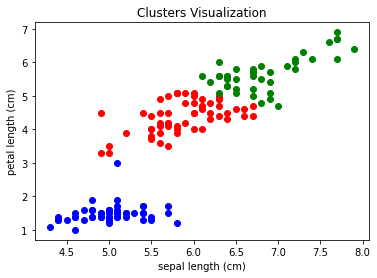

In [21]:
df1 = final_df[final_df['Clusters'] == 0]
df2 = final_df[final_df['Clusters'] == 1]
df3 = final_df[final_df['Clusters'] == 2]
plt.scatter(df1['sepal length (cm)'], df1['petal length (cm)'], color = 'red')
plt.scatter(df2['sepal length (cm)'], df2['petal length (cm)'], color = 'blue')
plt.scatter(df3['sepal length (cm)'], df3['petal length (cm)'], color = 'green')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('Clusters Visualization')
plt.show()

#### Applying  Elbow method on the Full dataset

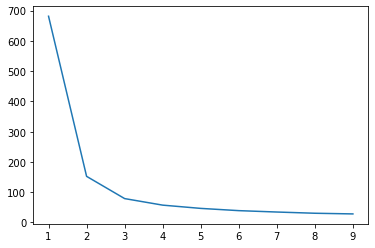

In [22]:
K = range(1,10)
SSE = []

for i in K:
    KM = KMeans(n_clusters = i)
    KM.fit(data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
    SSE.append(KM.inertia_)
    
plt.plot(K,SSE)    

In [23]:
model1 = KMeans(n_clusters = 3)
pred1 = model1.fit_predict(data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])